In [17]:
from Logger import Logger

logger = Logger()

logger.start_session(subject="Valuation", session="Afternoon")


The available subjects are: ['MFI', 'Valuation', 'IB']


The available sessions are: ['Morning', 'Afternoon', 'Evening']


Study session started at 17:52:19


In [18]:
while True:
    continue

Studying for: 01:42:20	Time spent studying today: 08:25:55

KeyboardInterrupt: 

In [15]:
#logger.abort_session() 

Study session of 17:38:19 aborted


In [19]:
logger.end_session()

Studying for: 01:42:23	Time spent studying today: 08:25:58Study session ended at 19:34:44
{'day': datetime.date(2025, 1, 22), 'start_time': datetime.datetime(2025, 1, 22, 17, 52, 19, 919906), 'end_time': datetime.datetime(2025, 1, 22, 19, 34, 44, 69728), 'total_time': datetime.timedelta(seconds=6144, microseconds=149822), 'session': 'Afternoon', 'subject': 'Valuation'}
File saved at: ./Logs/study_sessions.csv


In [32]:
df_today = logger._today_stats()[0]

time_today = df_today["total_time"].sum()
time_today

Timedelta('0 days 09:28:08.644575')

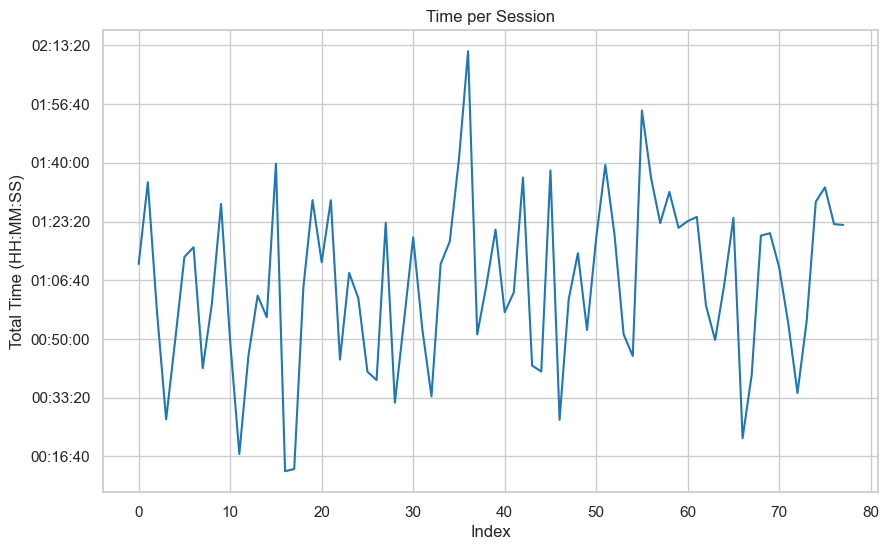

In [9]:
logger.plot_all_sessions()

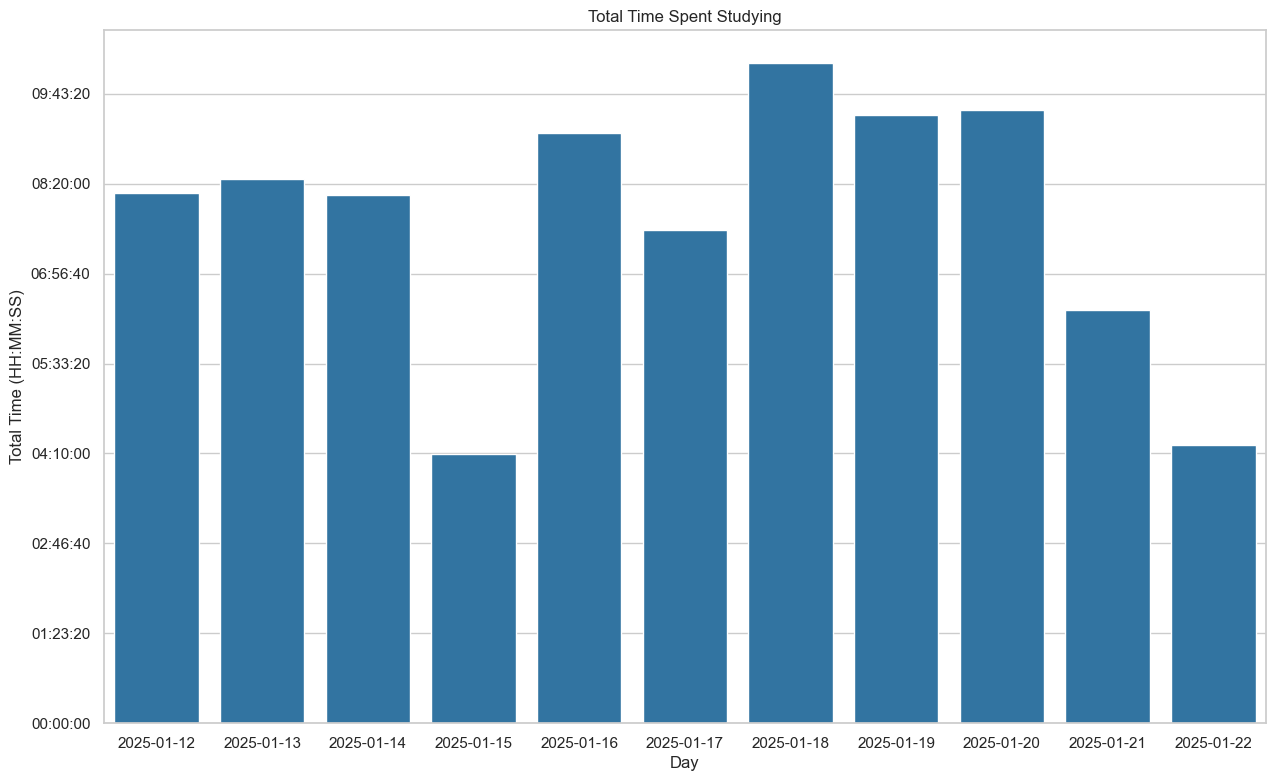

In [10]:
logger.plot_days_total()